In [9]:
%matplotlib notebook
from QDP import qdp, atom
import os.path
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
dp = '/home/ebert/jupyter-notebooks/FNode-data'
exp_date = '2017_11_17'
exp_names = [
    '2017_11_17_17_30_12_temperature', # 0 ms
    '2017_11_17_17_48_39_temperature-0_5ms',
    '2017_11_17_17_04_39_mz-readout_temperature-1ms',
    '2017_11_17_16_14_53_mz-readout_temperature-2ms',
    '2017_11_17_15_25_34_mz-readout_temperature' # 3 ms
]

cuts = [[16],[5]]

q = qdp.QDP(base_data_path=dp)
for exp_name in exp_names:
    experiment_file = os.path.join(exp_date, exp_name, 'results.hdf5')
    q.load_data_file(experiment_file)
q.set_thresholds(cuts)

name 'fort_exp' is not defined
name 'fort_exp' is not defined
name 'fort_exp' is not defined
name 'fort_exp' is not defined
name 'fort_exp' is not defined


In [3]:
q.experiments[0]['variable_list']
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']

In [4]:
retention = q.apply_thresholds()

In [5]:
tbl_str = "ivar:\t{0:.2f}\tretention:{1:.3f} +- {2:.3f}"
for i in range(len(retention['retention'].flatten())):
    print(tbl_str.format(
        retention['ivar'].flatten()[i],
        retention['retention'].flatten()[i],
        retention['error'].flatten()[i]
    ))

ivar:	0.00	retention:0.985 +- 0.007
ivar:	4.44	retention:0.970 +- 0.010
ivar:	8.89	retention:0.940 +- 0.014
ivar:	13.33	retention:0.905 +- 0.017
ivar:	17.78	retention:0.820 +- 0.023
ivar:	22.22	retention:0.721 +- 0.027
ivar:	26.67	retention:0.741 +- 0.026
ivar:	31.11	retention:0.610 +- 0.029
ivar:	35.56	retention:0.572 +- 0.029
ivar:	40.00	retention:0.470 +- 0.030
ivar:	0.00	retention:0.985 +- 0.007
ivar:	4.44	retention:0.915 +- 0.017
ivar:	8.89	retention:0.801 +- 0.024
ivar:	13.33	retention:0.725 +- 0.027
ivar:	17.78	retention:0.575 +- 0.029
ivar:	22.22	retention:0.485 +- 0.030
ivar:	26.67	retention:0.435 +- 0.029
ivar:	31.11	retention:0.353 +- 0.028
ivar:	35.56	retention:0.300 +- 0.027
ivar:	40.00	retention:0.290 +- 0.027
ivar:	0.00	retention:0.960 +- 0.012
ivar:	4.44	retention:0.920 +- 0.016
ivar:	8.89	retention:0.701 +- 0.027
ivar:	13.33	retention:0.615 +- 0.029
ivar:	17.78	retention:0.520 +- 0.030
ivar:	22.22	retention:0.380 +- 0.029
ivar:	26.67	retention:0.318 +- 0.028
ivar:	31.1

In [6]:
q.save_experiment_data(filename_prefix='mz_readout_heating_rate_data')

In [11]:
def fnode_release_recapture(t, T_uk):
    U_mk = 1.4
    wr_um = 2.5
    zr_um = 17.9  # calculated
    fr_khz = 48.0
    fa_khz = 4.7
    n=500000
    try:
        res = np.zeros(len(t))
        for i in xrange(len(t)):
            res[i] = atom.release_recapture(t[i], T_uk, U_mk, wr_um, zr_um, fr_khz, fa_khz, n=n)
        return res
    except Exception as e:
        print(e)
        return atom.release_recapture(t, T_uk, U_mk, wr_um, zr_um, fr_khz, fa_khz, n=n)

def residuals(T_uk, y, t, p0):
    res = y - fnode_release_recapture(t, T_uk)*p0
    print "T_uk = {}, -> {}".format(T_uk, np.sum(np.power(res, 2)))
    return res

def ls_err(T_uk, y, t, f0):
    res = residuals(T_uk, y, t, f0)
    return np.sum(np.power(res, 2))

<IPython.core.display.Javascript object>


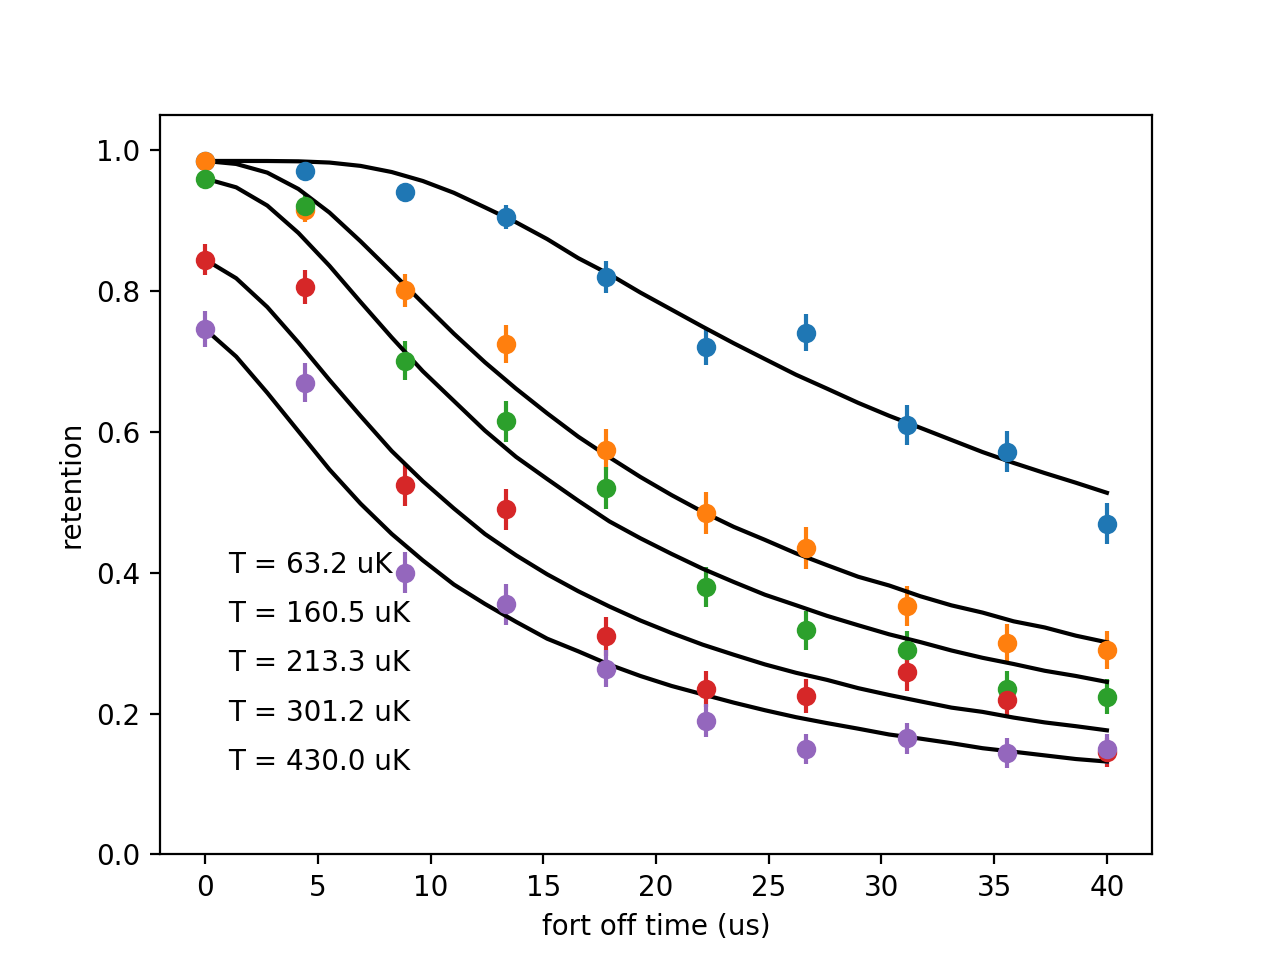

T_uk = [ 60.], -> 0.00903626458212
T_uk = [ 63.], -> 0.00787262918125
T_uk = [ 63.08880039], -> 0.00788297862748
T_uk = [ 66.24324041], -> 0.0089069912087
T_uk = [ 63.2128155], -> 0.00786271374828
T_uk = [ 66.37345627], -> 0.00892003503056
T_uk = [ 160.], -> 0.00509338742925
T_uk = [ 168.], -> 0.00611052589767
T_uk = [ 160.51943441], -> 0.00503457615769
T_uk = [ 168.54540613], -> 0.00654937057345
T_uk = [ 200.], -> 0.0108770711241
T_uk = [ 210.], -> 0.0092452673565
T_uk = [ 213.30583136], -> 0.00930931426059
T_uk = [ 223.97112293], -> 0.0102770727297
T_uk = [ 212.82644993], -> 0.00934964270189
T_uk = [ 300.], -> 0.0216754273887
T_uk = [ 315.], -> 0.022138534108
T_uk = [ 301.18076042], -> 0.0215200835188
T_uk = [ 316.23979844], -> 0.0221340736889
T_uk = [ 400.], -> 0.0120202963458
T_uk = [ 420.], -> 0.0117934776058
T_uk = [ 422.52278022], -> 0.0118901218914
T_uk = [ 443.64891924], -> 0.0119327345737
T_uk = [ 429.99262213], -> 0.0116814291524
T_uk = [ 451.49225324], -> 0.0120300291171
T_

In [15]:
fig, ax = plt.subplots()
guesses = [60.0, 160, 200, 300, 400]
T_opts = []
for e in range(len(retention['ivar'])):
    ax.errorbar(retention['ivar'][e], retention['retention'][e],
                yerr=retention['error'][e],
                fmt = 'o'
    )
    x = optimize.least_squares(
        residuals,
        np.array(guesses[e]),
        args=(retention['retention'][e], retention['ivar'][e], retention['retention'][e][0]),
        diff_step=0.05,
        xtol=0.01
    )
    if x['success']:
        T_opt = x['x'][0]
    T_opts.append(T_opt)
    xs = np.linspace(min(retention['ivar'][e]), max(retention['ivar'][e]), 30)
    ax.plot(xs, fnode_release_recapture(xs, T_opt)*retention['retention'][e][0], 'k-')
    ax.text(1, 0.4-e*0.07, "T = {:.1f} uK".format(T_opt))
    
ax.set_ylim(0, 1.05)
ax.set_xlabel(xlab)
ax.set_ylabel('retention')
fmts = ['pdf', 'png']
fn = os.path.join(dp, os.path.dirname(experiment_file), 'mz_readout_heating_rate.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)

<IPython.core.display.Javascript object>


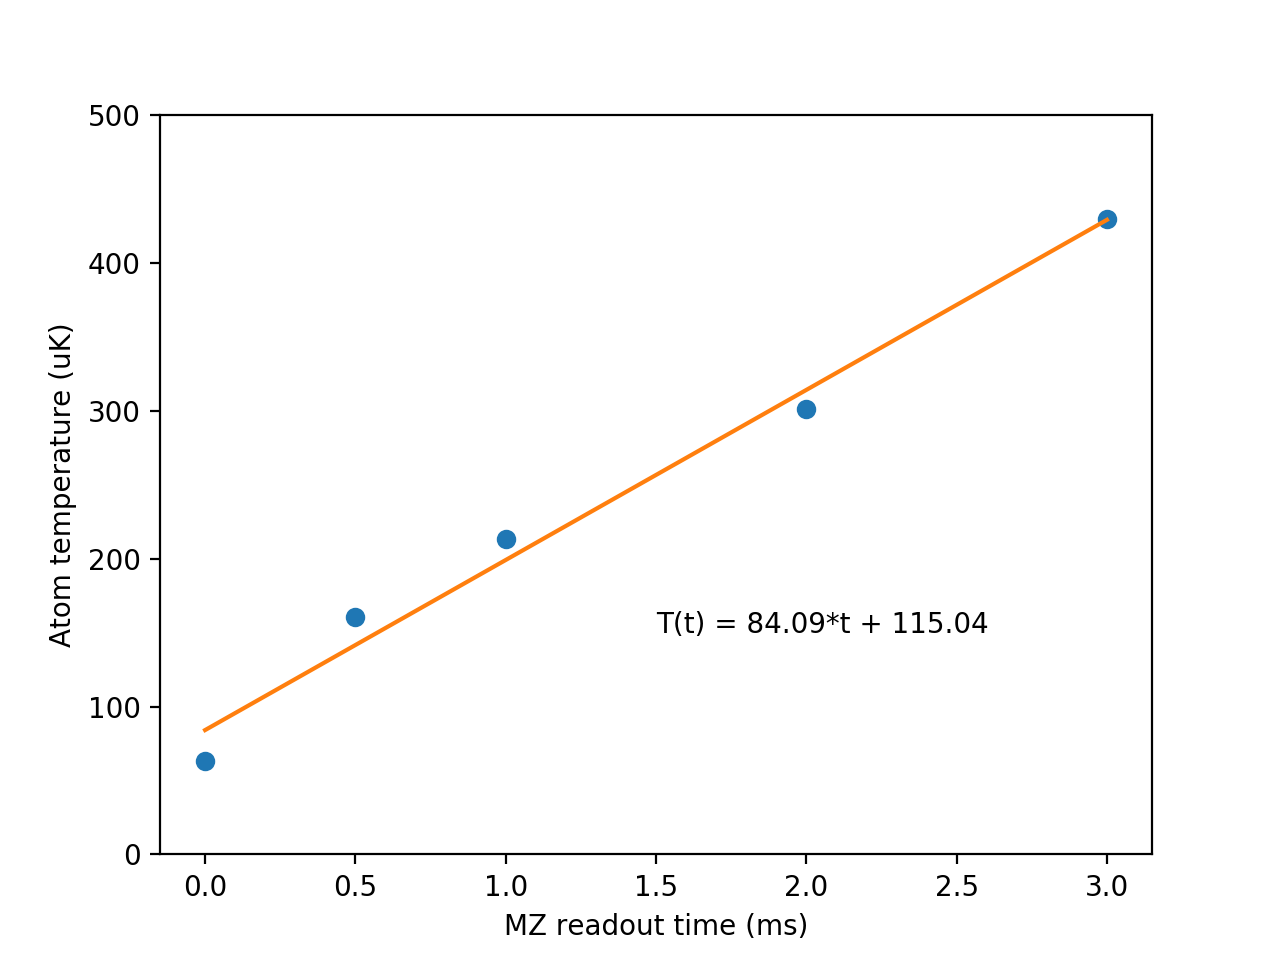

In [24]:
readout_time = [0, 0.5, 1, 2, 3]
fig, ax = plt.subplots()
coeffs = np.polyfit(readout_time, T_opts, 1)
ax.plot(readout_time, T_opts, 'o')
xs = np.linspace(0, 3, 100)
ax.plot(xs, np.poly1d(coeffs)(xs))
ax.set_xlabel('MZ readout time (ms)')
ax.set_ylabel('Atom temperature (uK)')
ax.text(1.5, 150, "T(t) = {:.2f}*t + {:.2f}".format(coeffs[1], coeffs[0]))
ax.set_ylim(0, 500)
fmts = ['pdf', 'png']
fn = os.path.join(dp, os.path.dirname(experiment_file), 'mz_readout_heating_rate_actual.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)